<a href="https://colab.research.google.com/github/suganthialagumalai/suganthialagumalai/blob/main/Brain%20vs_Body_WeightAssessment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brain vs. Body Weight
In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

Tasks
Find the linear regression equation for this data for brain weight to body weight.
Chart the original data and the equation on the chart.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [24]:
df = pd.read_fwf("/content/brain_body.txt")

In [25]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
print(df.shape)

(62, 2)


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


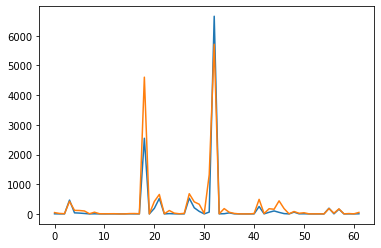

In [26]:
plt.plot(df)

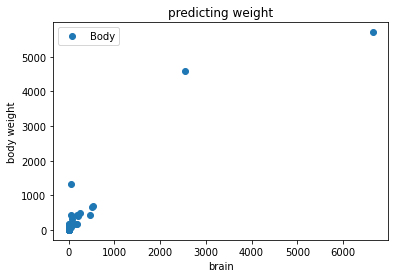

In [ ]:
# explore the data by ploting
import matplotlib.pyplot as plt
df.plot(x='Brain', y='Body',style='o')
plt.xlabel('brain')
plt.ylabel('body weight')
plt.title('predicting weight')
plt.show()

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [27]:
df['logx'] = np.log(df['Body'])
df['logy'] = np.log(df['Brain'])

In [28]:
df

,Brain,Body,logx,logy
0,3.385,44.5,3.795489,1.219354
1,0.480,15.5,2.740840,-0.733969
2,1.350,8.1,2.091864,0.300105
3,465.000,423.0,6.047372,6.142037
4,36.330,119.5,4.783316,3.592644
...,...,...,...,...
57,160.000,169.0,5.129899,5.075174
58,0.900,2.6,0.955511,-0.105361
59,1.620,11.4,2.433613,0.482426
60,0.104,2.5,0.916291,-2.263364


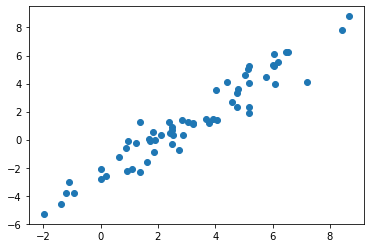

In [29]:
plt.scatter(df['logx'],df['logy'])

In [30]:
X = df.drop(['Brain','Body','logy'], axis = 1)
Y = df['logy']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 988)

In [32]:
from sklearn.preprocessing import RobustScaler

In [33]:
sc = RobustScaler()
sc.fit_transform(X_train)
sc.fit(X_test)

RobustScaler()

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [36]:
Y_pred = lr.predict(X_test)

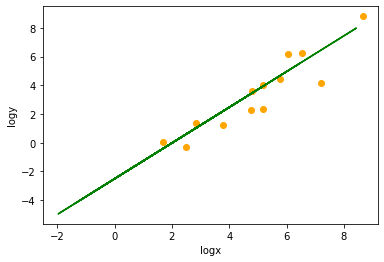

In [40]:
plt.scatter(X_test, Y_test,color='orange')
plt.plot(X_train, lr.predict(X_train), color= 'green')
plt.xlabel('logx')
plt.ylabel('logy')
plt.show()

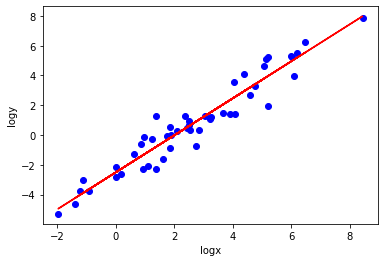

In [41]:
plt.scatter(X_train, Y_train,color='blue')
plt.plot(X_train, lr.predict(X_train), color= 'red')
plt.xlabel('logx')
plt.ylabel('logy')
plt.show()

In [42]:
from sklearn.metrics import accuracy_score
score = accuracy_score
lr.score(X_train,Y_train)

0.9223831903465844

In [43]:
lr.score(X_test,Y_test)

0.8401943830695706

In [44]:
print('R^2:',metrics.r2_score(Y_test, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, Y_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

R^2: 0.8401943830695706
Adjusted R^2: 0.8256665997122589
MAE: 0.810223124089705
MSE: 1.0194455438110674
RMSE: 1.0096759598064458


In [45]:
Y_pred = lr.predict(X_train)
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, Y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.9223831903465844
Adjusted R^2: 0.9207317688645968
MAE: 0.6719548119601693
MSE: 0.6984239286416258
RMSE: 0.8357176129779879
